<a href="https://colab.research.google.com/github/Adolfo-Hugo/previsao-monte-carlo/blob/main/previs%C3%A3o_modelo_monte_carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from scipy import stats

**CARREGANDO E VISUALIZANDO DATAFRAME**

In [247]:
df = pd.read_csv('acoes.csv')
df

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.20,11.846200,0.232812,35.732101,47.259998
1,2015-01-05,14.850000,15.00,11.926900,0.237187,34.634201,46.320000
2,2015-01-06,15.210000,14.80,11.750000,0.234062,32.468300,46.580002
3,2015-01-07,14.550000,14.67,11.615400,0.241875,32.238701,48.150002
4,2015-01-08,14.270000,14.15,11.811500,0.240000,32.987301,48.509998
...,...,...,...,...,...,...,...
1441,2020-10-27,18.600000,14.17,83.239998,25.450001,28.500000,95.800003
1442,2020-10-28,16.920000,12.77,79.139999,24.629999,27.500000,92.430000
1443,2020-10-29,16.610001,12.68,80.029999,25.360001,28.500000,92.910004
1444,2020-10-30,15.690000,12.28,75.830002,24.629999,27.000000,90.660004


**VISUALIZANDO DF EM GRAFICOS**

In [248]:
figura = px.line(title ='Historico preco das acoes')
for i in df.columns[1:]:
    figura.add_scatter(x=df['Date'], y=df[i], name=i)
figura.show()

**FILTRANDO DF PARA ACOES DA MGLU**

In [249]:
df_bova = pd.DataFrame(df['BOVA'])
df_bova


,BOVA
0,47.259998
1,46.320000
2,46.580002
3,48.150002
4,48.509998
...,...
1441,95.800003
1442,92.430000
1443,92.910004
1444,90.660004


**NORMALIZANDO DADOS**

In [250]:
df_normalizado = df_bova.copy()
for i in df_bova:
  df_normalizado[i] = df_bova[i]/df_bova[i][0]
df_normalizado

,BOVA
0,1.000000
1,0.980110
2,0.985612
3,1.018832
4,1.026449
...,...
1441,2.027084
1442,1.955777
1443,1.965933
1444,1.918324


**TAXA DE RETORNO**

In [251]:
df_taxa_retorno = np.log(1+df_normalizado.pct_change())
df_taxa_retorno

,BOVA
0,NaN
1,-0.020090
2,0.005597
3,0.033150
4,0.007449
...,...
1441,-0.010074
1442,-0.035811
1443,0.005180
1444,-0.024515


**MEDIA DA TAXA DE RETORNO**

In [252]:
media = df_taxa_retorno.mean()
media

,0
BOVA,0.000464


**VARIANCA DA TAXA DE RETORNO**

In [253]:
varianca = df_taxa_retorno.var()
varianca

,0
BOVA,0.000304


In [254]:
drift = media - (0.5* varianca)
drift

,0
BOVA,0.000312


**CALCULO DOS RETORNOS DIARIOS**

In [255]:
dias_frente  = 976
simulacoes =10


DESVIO PADROÃO: O QUANTO AS TX RETORNOS ESTAO AFASTADAS DA MEDIA

In [256]:
desvio_padrao = df_taxa_retorno.std()
desvio_padrao

,0
BOVA,0.017432


In [257]:
z = stats.norm.ppf(np.random.rand(dias_frente, simulacoes))
z.shape

(976, 10)

In [258]:
z

array([[ 0.33932412,  0.35668766,  0.04335171, ...,  0.47108835,
         0.12902378, -1.18448785],
       [-0.53023417,  0.84839932,  0.55364383, ...,  0.31363194,
         1.34711546, -1.20475311],
       [-1.07118495, -0.64459044,  0.17172249, ..., -0.13087843,
        -0.67493034, -0.04271228],
       ...,
       [-0.61471304, -1.09036747,  1.70834242, ...,  0.96787433,
         0.12433709,  0.78765424],
       [-1.51747708,  0.29893715, -1.54582592, ...,  0.09999315,
         0.43550291,  1.38248156],
       [ 0.28638855, -0.54641058,  1.13433946, ..., -0.56147381,
         1.27561158,  1.66032008]])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

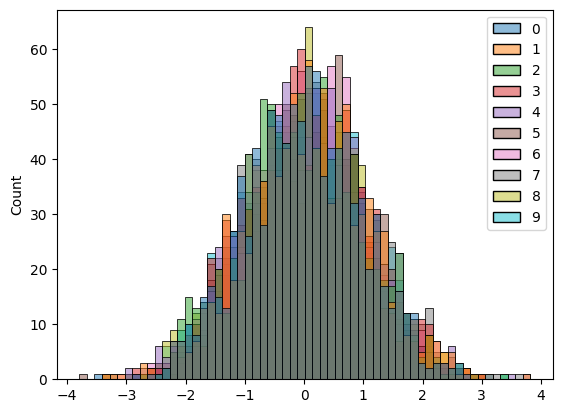

In [259]:
sns.histplot(z);

In [260]:
retorno_diario = np.exp(drift.values + z*desvio_padrao.values)
retorno_diario

array([[1.00624662, 1.00655123, 1.0010684 , ..., 1.00856052, 1.00256454,
        0.97986964],
       [0.9911089 , 1.01521593, 1.01001298, ..., 1.00579606, 1.02408026,
        0.97952355],
       [0.98180688, 0.98913515, 1.00331104, ..., 0.99803261, 0.98861215,
        0.99956767],
       ...,
       [0.98965045, 0.98147863, 1.0305491 , ..., 1.0173325 , 1.00248263,
        1.01414149],
       [0.97419833, 1.00553845, 0.97371703, ..., 1.00205731, 1.00793508,
        1.02471179],
       [1.00531851, 0.99082947, 1.02028889, ..., 0.99056933, 1.02280459,
        1.02968677]])

In [261]:
retorno_diario.shape

(976, 10)

In [262]:
retorno_diario

array([[1.00624662, 1.00655123, 1.0010684 , ..., 1.00856052, 1.00256454,
        0.97986964],
       [0.9911089 , 1.01521593, 1.01001298, ..., 1.00579606, 1.02408026,
        0.97952355],
       [0.98180688, 0.98913515, 1.00331104, ..., 0.99803261, 0.98861215,
        0.99956767],
       ...,
       [0.98965045, 0.98147863, 1.0305491 , ..., 1.0173325 , 1.00248263,
        1.01414149],
       [0.97419833, 1.00553845, 0.97371703, ..., 1.00205731, 1.00793508,
        1.02471179],
       [1.00531851, 0.99082947, 1.02028889, ..., 0.99056933, 1.02280459,
        1.02968677]])

**PREVISOES DE PRECOS FUTUROS**

In [263]:
previsoes = np.zeros_like(retorno_diario)
previsoes

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [264]:
df_bova.iloc[-1]

,1445
BOVA,92.410004


In [265]:
previsoes[0] = df_bova.iloc[-1]
previsoes

array([[92.41000366, 92.41000366, 92.41000366, ..., 92.41000366,
        92.41000366, 92.41000366],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [266]:
for dia in range(1, dias_frente):
  previsoes[dia] = previsoes[dia-1]*retorno_diario[dia]
previsoes

array([[ 92.41000366,  92.41000366,  92.41000366, ...,  92.41000366,
         92.41000366,  92.41000366],
       [ 91.58837753,  93.81610812,  93.33530357, ...,  92.9456174 ,
         94.63526012,  90.51777499],
       [ 89.92209902,  92.79681025,  93.64434093, ...,  92.76275683,
         93.55756829,  90.478641  ],
       ...,
       [ 91.74814968, 357.25027439,  88.60750984, ..., 147.15665776,
        103.99510661,  99.52920576],
       [ 89.38089459, 359.22888651,  86.27864129, ..., 147.45940472,
        104.82031652, 101.9887509 ],
       [ 89.8562682 , 355.93456579,  88.02913887, ..., 146.06876339,
        107.21070061, 105.01646719]])

In [267]:
previsoes.T.shape

(10, 976)

In [268]:
figura = px.line(title = 'PREVISOES DAS SIMULAÇÕES DE ACOES - BOVA')
for i in range(len(previsoes.T)):
  figura.add_scatter( y= previsoes.T[i], name = i)
figura.show()

**COMPARACAO PREVISOES COM PRECOS REAIS**

In [269]:
import yfinance as yf
dataset_bova = yf.download(tickers ='BOVA11.SA', start='2020-11-04')


[*********************100%***********************]  1 of 1 completed


In [270]:
dataset_bova

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-04,93.510002,94.629997,92.849998,94.160004,94.160004,12844440
2020-11-05,95.769997,97.169998,95.379997,96.949997,96.949997,12692230
2020-11-06,96.089996,97.339996,96.089996,97.190002,97.190002,8765724
2020-11-09,100.389999,101.150002,99.269997,99.500000,99.500000,19613780
2020-11-10,99.930000,101.820000,99.730003,101.000000,101.000000,13893580
...,...,...,...,...,...,...
2024-09-27,129.369995,130.330002,129.039993,129.039993,129.039993,5342563
2024-09-30,129.839996,129.839996,128.369995,128.429993,128.429993,4930837
2024-10-01,128.899994,129.850006,128.449997,128.860001,128.860001,7392815


In [271]:

dataset_bova.rename(columns={'Adj Close':'MGLU'}, inplace=True)
dataset_bova = dataset_bova['MGLU']
dataset_bova

,MGLU
Date,
2020-11-04,94.160004
2020-11-05,96.949997
2020-11-06,97.190002
2020-11-09,99.500000
2020-11-10,101.000000
...,...
2024-09-27,129.039993
2024-09-30,128.429993
2024-10-01,128.860001


**SAVALNDO DF**

In [272]:
dataset_bova.to_csv('magazine_teste.csv')

**IMPORTANDO DF**

In [273]:
dataset_bova = pd.read_csv('magazine_teste.csv')
dataset_bova

,Date,MGLU
0,2020-11-04,94.160004
1,2020-11-05,96.949997
2,2020-11-06,97.190002
3,2020-11-09,99.500000
4,2020-11-10,101.000000
...,...,...
971,2024-09-27,129.039993
972,2024-09-30,128.429993
973,2024-10-01,128.860001
974,2024-10-02,129.850006


In [274]:
len(dataset_bova)

976

In [275]:

dataset_bova

,Date,MGLU
0,2020-11-04,94.160004
1,2020-11-05,96.949997
2,2020-11-06,97.190002
3,2020-11-09,99.500000
4,2020-11-10,101.000000
...,...,...
971,2024-09-27,129.039993
972,2024-09-30,128.429993
973,2024-10-01,128.860001
974,2024-10-02,129.850006


In [276]:
simulacao1 = previsoes.T[0][0:len(dataset_bova)]
simulacao1

array([ 92.41000366,  91.58837753,  89.92209902,  90.32914053,
        88.64955439,  89.95528173,  91.37664071,  93.16664026,
        95.73379333,  96.93103975,  94.22763503,  94.14795153,
        96.37424843,  96.3679352 ,  95.69431831,  94.66598223,
        95.16687964,  98.12210853,  98.32542629,  97.31872257,
        99.73333391,  98.30749704,  98.5235829 ,  99.58752548,
       100.84679721,  98.86687531,  99.8616041 , 102.06242568,
       105.06555336, 108.1233452 , 107.07759354, 109.02946997,
       110.22352746, 111.51029015, 111.84861225, 111.79812524,
       112.42830552, 111.92199577, 109.93691648, 109.31853305,
       109.00360225, 110.2595184 , 112.96176175, 111.05849256,
       112.08901933, 113.63734598, 115.85432701, 118.02677194,
       120.76323151, 116.05907464, 113.93214491, 114.04514121,
       113.78854542, 112.59313836, 113.44385411, 110.45112186,
       111.16259519, 112.49856794, 110.66809729, 107.20050724,
       106.76655094, 108.39016907, 108.02619817, 108.96

In [277]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(dataset_bova['MGLU'], simulacao1)

28.036165856117872

In [278]:
erros =[]
for i in range(len(previsoes.T)):
  simulacao = previsoes.T[i][0:len(dataset_bova)]
  erros.append(mean_absolute_error(dataset_bova['MGLU'], simulacao))

erros

[28.036165856117872,
 66.21108921780898,
 25.364142227653087,
 25.98822548198695,
 19.7893863385646,
 84.39251423652809,
 16.936682766088186,
 15.467646496002862,
 16.00449871855751,
 16.749232030779314]

In [279]:
figura = px.line(title = 'Previsões do preço das ações - simulação')
figura.add_scatter(y = dataset_bova['MGLU'], name = 'Valor real')
figura.add_scatter(y = previsoes.T[7], name = 'Melhor  simulação')
figura.add_scatter(y = previsoes.T[2], name = 'Pior simulação')